# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(20)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        print(json.dumps(city_weather,indent=4))
                   

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount isa
{
    "coord": {
        "lon": 139.5,
        "lat": -20.7333
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 17.87,
        "feels_like": 16.6,
        "temp_min": 17.87,
        "temp_max": 17.87,
        "pressure": 1021,
        "humidity": 34
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.6,
        "deg": 150
    },
    "clouds": {
        "all": 0
    },
    "dt": 1683845111,
    "sys": {
        "type": 1,
        "id": 9495,
        "country": "AU",
        "sunrise": 1683838971,
        "sunset": 1683879239
    },
    "timezone": 36000,
    "id": 2065594,
    "name": "Mount Isa",
    "cod": 200
}
-20.7333
Processing Record 2 of Set 1 | jamestown
{
    "coord": {
        "lon": -79.2353,

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.7333,139.5000,17.87,34,0,3.60,AU,1683845111
1,jamestown,42.0970,-79.2353,23.80,31,0,4.63,US,1683845111
2,waitangi,-43.9535,-176.5597,11.57,79,38,0.89,NZ,1683845111
3,adamstown,-25.0660,-130.1015,21.72,57,73,7.85,PN,1683845112
4,camacupa,-12.0167,17.4833,13.49,56,2,0.30,AO,1683845112


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\Anaconda\python-api-challenge\weatherpy\output_data\cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("C:\Anaconda\python-api-challenge\weatherpy\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,17.87,34,0,3.60,AU,1683845111
1,jamestown,42.0970,-79.2353,23.80,31,0,4.63,US,1683845111
2,waitangi,-43.9535,-176.5597,11.57,79,38,0.89,NZ,1683845111
3,adamstown,-25.0660,-130.1015,21.72,57,73,7.85,PN,1683845112
4,camacupa,-12.0167,17.4833,13.49,56,2,0.30,AO,1683845112


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

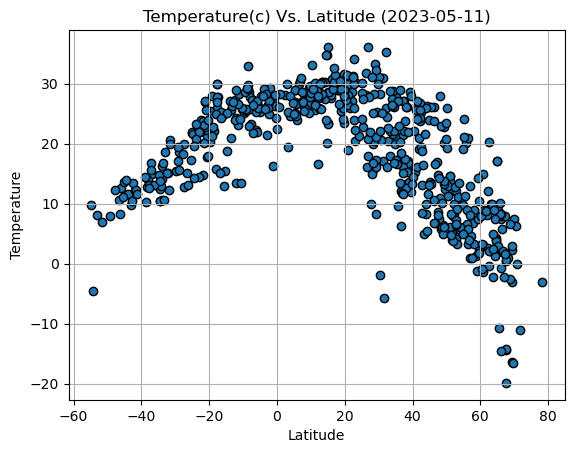

In [62]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black')
plt.title('Temperature(c) Vs. Latitude (2023-05-11)')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.grid()


# Save the figure
plt.savefig('C:\Anaconda\python-api-challenge\weatherpy\output_data')

# Show plot
plt.show()

#### Latitude Vs. Humidity

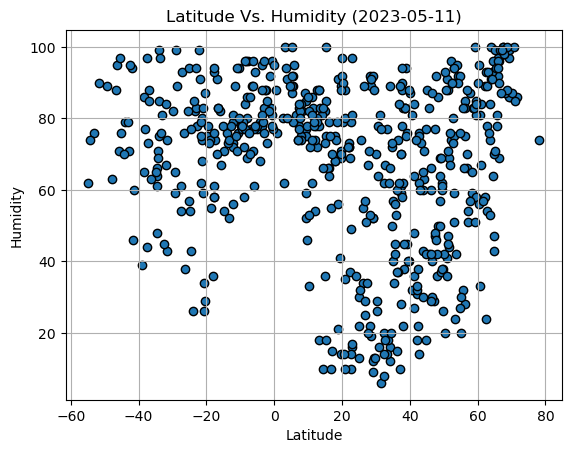

In [65]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black')
plt.title('Latitude Vs. Humidity (2023-05-11)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('C:\Anaconda\python-api-challenge\weatherpy\output_data')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

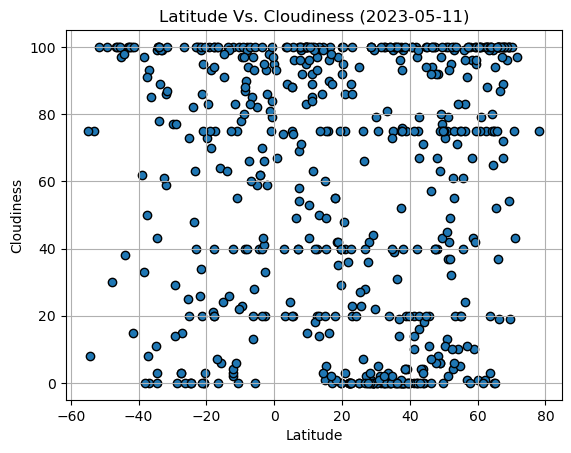

In [69]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black')
plt.title('Latitude Vs. Cloudiness (2023-05-11)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('C:\Anaconda\python-api-challenge\weatherpy\output_data')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

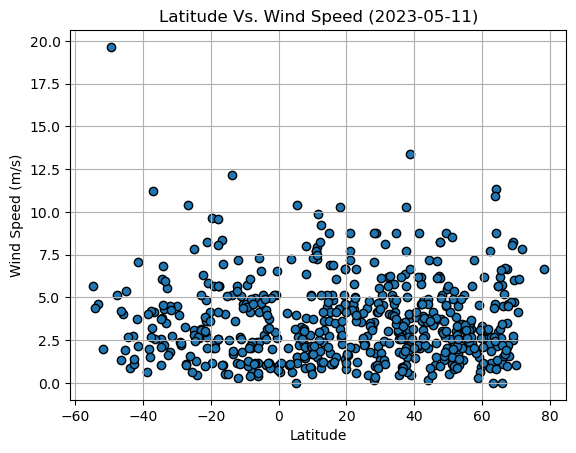

In [70]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black')
plt.title('Latitude Vs. Wind Speed (2023-05-11)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('C:\Anaconda\python-api-challenge\weatherpy\output_data')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
#

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,23.80,31,0,4.63,US,1683845111
5,catalhoyuk,37.6685,32.8269,13.12,88,93,2.86,TR,1683845112
9,keflavik,64.0049,-22.5624,8.95,100,100,11.32,IS,1683845113
11,thompson,55.7435,-97.8558,20.09,32,40,2.57,CA,1683845113
12,isafjordur,66.0755,-23.1240,7.41,92,100,4.52,IS,1683845114


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,17.87,34,0,3.60,AU,1683845111
2,waitangi,-43.9535,-176.5597,11.57,79,38,0.89,NZ,1683845111
3,adamstown,-25.0660,-130.1015,21.72,57,73,7.85,PN,1683845112
4,camacupa,-12.0167,17.4833,13.49,56,2,0.30,AO,1683845112
6,punta arenas,-53.1500,-70.9167,8.06,76,75,4.63,CL,1683845112


###  Temperature vs. Latitude Linear Regression Plot

Text(6, 10, 'y = -0.46x + 34.64')

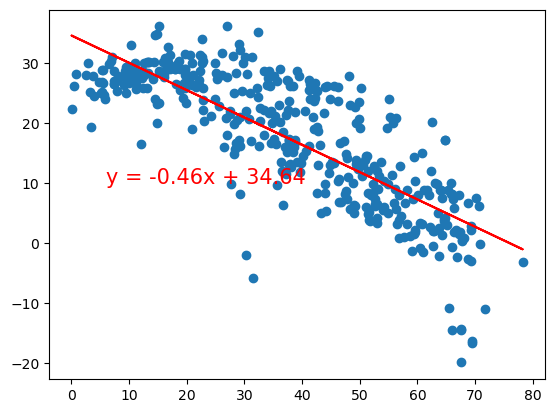

In [90]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

Text(6, 10, 'y = 0.4x + 28.97')

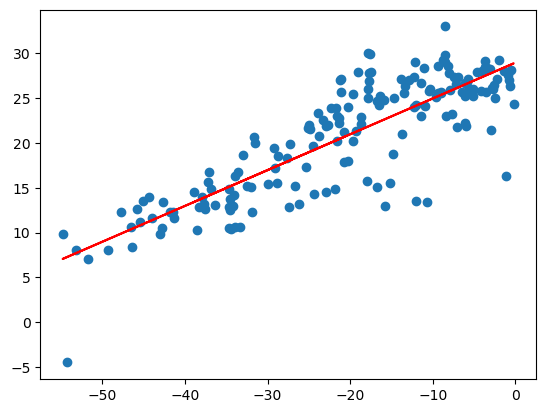

In [91]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

**Discussion about the linear relationship:**As the latitude gets further from zero, whether positively or negatively,  the temperatures drop on average.

### Humidity vs. Latitude Linear Regression Plot

Text(6, 10, 'y = 0.12x + 60.02')

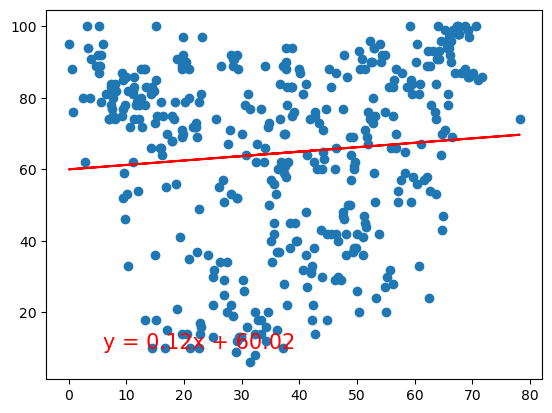

In [93]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

Text(6, 10, 'y = 0.18x + 78.83')

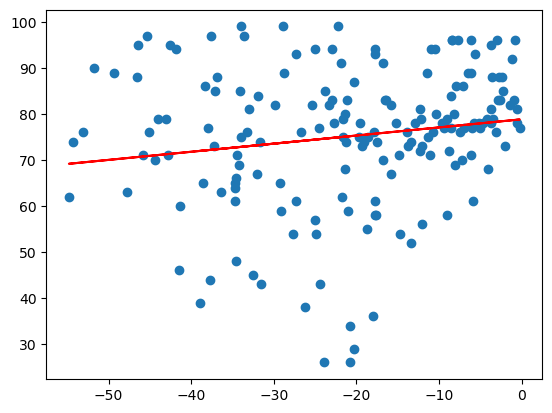

In [94]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

**Discussion about the linear relationship:** Humidity seems to have very little influence on humidity, if any.

### Cloudiness vs. Latitude Linear Regression Plot

Text(6, 10, 'y = 0.19x + 47.83')

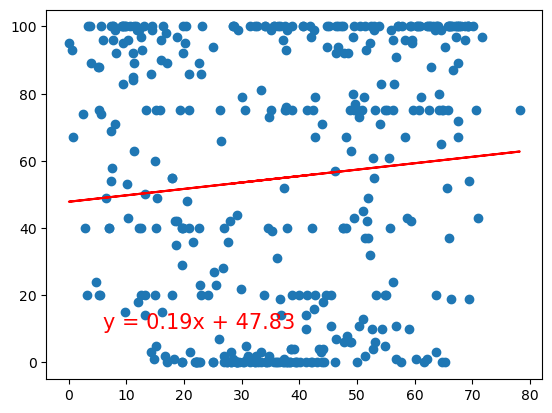

In [95]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

Text(6, 10, 'y = -0.07x + 60.72')

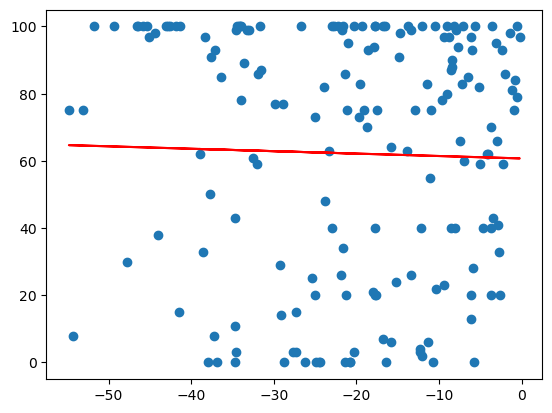

In [96]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

**Discussion about the linear relationship:** The further from the Equator, the cloudier you can expect the skies to become.

### Wind Speed vs. Latitude Linear Regression Plot

Text(6, 10, 'y = -0.0x + 3.61')

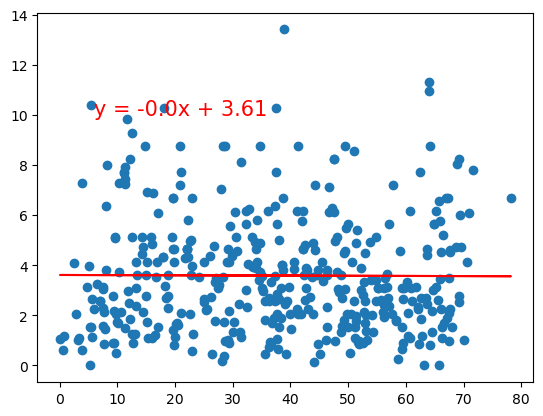

In [97]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

Text(6, 10, 'y = -0.02x + 3.15')

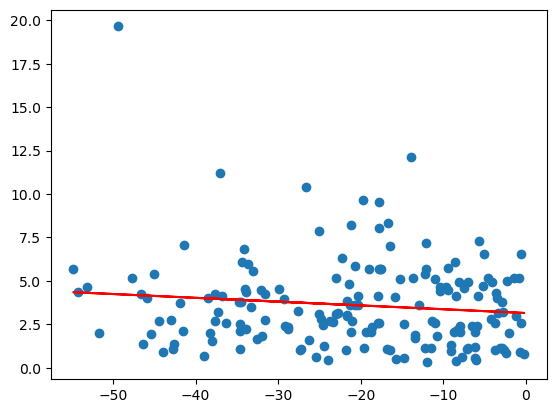

In [98]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

**Discussion about the linear relationship:** Wind speed and latitude have almost zero correlation. So the further from the Equator, the wind speeds won't change too greatly on average.